**Questão 1**


In [ ]:
!pip install auto-sklearn
#Após executar esse comando é necessário reiniciar o ambiente de execução
#Para isso basta ir em ambiente de execução > reiniciar ambiente de execução 

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn import model_selection
from sklearn.cluster import KMeans, AgglomerativeClustering
import autosklearn.classification

df = pd.read_csv('student_prediction.csv', delimiter=",") #abrindo o arquivo
df #print da variável df

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
df = df.drop(columns=['STUDENTID']) #removi o id do aluno pois não interfere na classificação
df

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
df = df.dropna(how ='any') #elimina todas as linhas com dados ausentes
df

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
df = df.drop_duplicates() #elimina todas as linhas com dados duplicados
df

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


Text(0.5, 1.0, 'Outliers da base não normalizada')

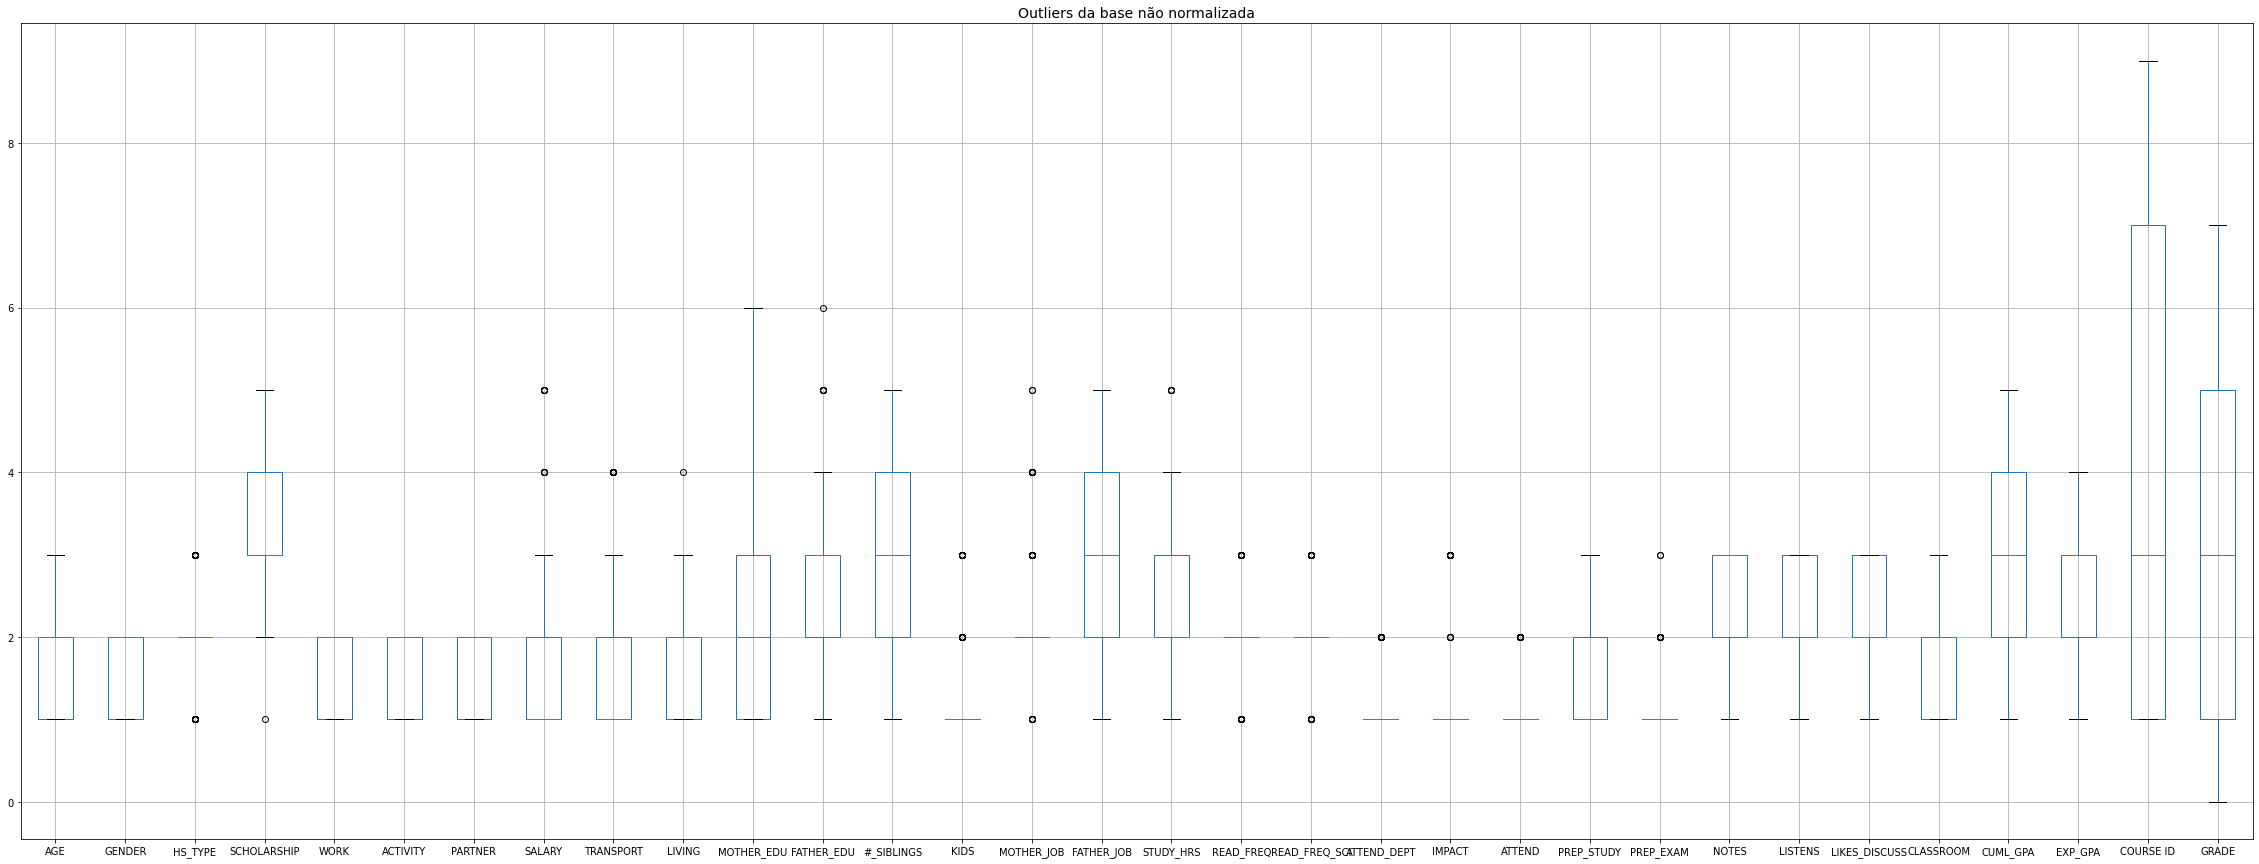

In [ ]:
df.boxplot(grid=True, figsize= (40,15))
plt.title('Outliers da base não normalizada', fontsize=14)
#Como podemos observar, existem outliers em varias variáveis, porém esses outliers são valores reais e não erros, por isso resolvi mantê-los

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') #mapa de correlação 
#Pode-se observar que o atributo READ_FREQ_SCI tem correlação 0.003 com a saida, portanto tirarei ele futuramente para realizar os testes

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
AGE,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,-0.068972,-0.070108,0.069748,0.172668,-0.200812,-0.141571,-0.172833,0.059712,0.078849,-0.226882,0.007306,0.060027,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
GENDER,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,0.062370,0.120638,0.060216,-0.028781,-0.056143,-0.033997,-0.067750,0.045206,-0.005233,-0.363971,-0.144138,-0.065795,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
HS_TYPE,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,-0.166336,-0.134322,0.051827,0.009990,-0.050269,-0.131680,-0.174719,-0.010144,0.050529,-0.009101,0.124317,-0.032180,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
SCHOLARSHIP,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,-0.109006,-0.222776,-0.037831,-0.005450,0.023919,-0.012785,0.003758,0.008877,0.061543,0.214838,0.041443,-0.141190,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
WORK,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,0.153780,0.205138,-0.134003,-0.165492,-0.044113,0.005919,-0.114824,-0.096332,-0.171384,-0.018640,-0.120973,0.028198,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
ACTIVITY,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,-0.122430,-0.113252,0.143273,-0.057563,-0.161412,0.019123,-0.129342,-0.281283,-0.214557,-0.020602,-0.024023,0.098693,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
PARTNER,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,-0.043001,0.045241,0.033182,-0.128034,-0.211091,-0.176901,0.048897,0.090581,-0.004119,0.103634,0.038636,0.154225,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
SALARY,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,0.123932,0.031212,0.007866,0.101380,0.028451,-0.109689,-0.097935,-0.072357,0.009390,-0.106800,0.059872,0.111506,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
TRANSPORT,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,0.168831,0.090659,-0.253099,-0.033565,0.274118,-0.116259,0.007134,-0.046942,-0.124146,0.059791,0.070998,-0.056759,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
LIVING,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,0.159529,0.206439,-0.276875,-0.059119,0.384892,0.016447,-0.021241,-0.081128,-0.155241,0.179520,0.001039,-0.135860,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


Text(0, 0.5, 'Valores')

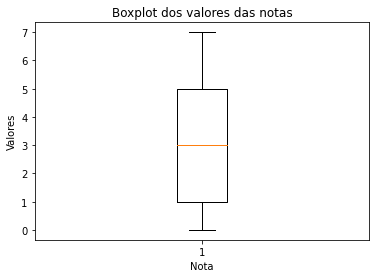

In [ ]:
plt.boxplot(df['GRADE']) #gráfico de boxplot

plt.title('Boxplot dos valores das notas')
plt.xlabel('Nota')
plt.ylabel('Valores')

#Podemos observar que a mediana está na classe 3, ou seja, temos a mesma quantidade de valores acima de 3 que abaixo de 3, isso implica que as classes estão desbalanceadas
#Tambem podemos observar que não existem outliers

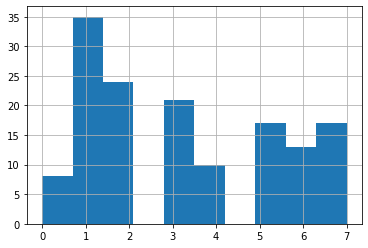

In [ ]:
df['GRADE'].hist() 
#O histograma evidencia o desbalanceamento das classes existentes em GRADE

In [ ]:
from sklearn.utils import resample

fail = df[df['GRADE']==0]
dd = df[df['GRADE']==1]
dc = df[df['GRADE']==2]
cc = df[df['GRADE']==3]
cb = df[df['GRADE']==4]
bb = df[df['GRADE']==5]
ba = df[df['GRADE']==6]
aa = df[df['GRADE']==7]

#Resolvi fazer o oversample na base de dados, aumentando os valores das classes com poucas amostras até ficarem com a mesma quantidade de amostras da classe majoritária que é 35.
#Para isso separei cada classe em uma tabela 

In [ ]:
failUp = resample(fail, replace=True, n_samples=len(dd), random_state=0)
dcUp = resample(dc, replace=True, n_samples=len(dd), random_state=34)
ccUp = resample(cc, replace=True, n_samples=len(dd), random_state=2)
cbUp = resample(cb, replace=True, n_samples=len(dd), random_state=15)
bbUp = resample(bb, replace=True, n_samples=len(dd), random_state=7)
baUp = resample(ba, replace=True, n_samples=len(dd), random_state=13)
aaUp = resample(aa, replace=True, n_samples=len(dd), random_state=48)

#Realizei o oversample para cada tabela

In [ ]:
df = pd.concat([failUp,dd,dcUp,ccUp,cbUp,bbUp,baUp,aaUp])
#Todas as tabelas foram concatenadas para formar o dataframe balanceado

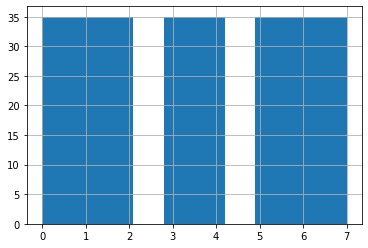

In [ ]:
df['GRADE'].hist()
#df balanceado

Accuracy: 0.8
Precison: 0.8398018648018648


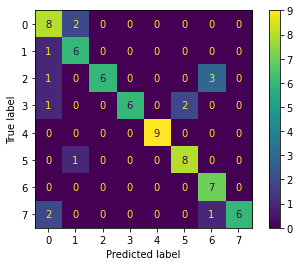

In [ ]:
normalized_df=((df-df.min())/(df.max()-df.min()))
normalized_df['GRADE']=df['GRADE']

#Normalizei a base para melhor aplicação dos métodos

X = normalized_df.drop(columns=['GRADE'])
y = normalized_df['GRADE']

#Separei entre Sample e Target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=1)

#Configuração do automl para a base com todos os atributos

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=300, #Tempo em segundos de execução do automl
    per_run_time_limit=30, #Tempo limite para testar cada modelo
    resampling_strategy='cv', #Utilizando o cross validation
    resampling_strategy_arguments={'folds': 10}, #Utilizando k = 10
)

automl.fit(X_train, y_train)

predictions = automl.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, predictions))
print('Precison:', metrics.precision_score(y_test, predictions, average='macro'))
cm = metrics.confusion_matrix(y_test, predictions, labels=automl.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=automl.classes_)
disp.plot()
plt.show()

#Acurácia: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente
#Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas 
#Matriz de confusão: é uma tabela que indica os erros e acertos do modelo, comparando com o resultado esperado, pode-se observar abaixo que as 
#classes que o modelo mais errou foram as classes 0 e 6, isso pode ter acontecido devido ambas as classes terem poucos dados antes do resample
#em relação as demais.


Accuracy: 0.7571428571428571
Precison: 0.8235236985236984


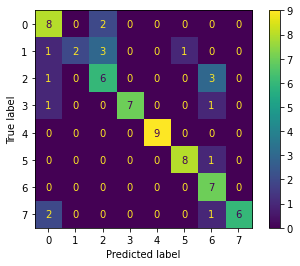

In [ ]:
#Realizarei o mesmo procedimento acima só que dessa vez sem o atributo READ_FREQ_SCI

normalized_df1=((df-df.min())/(df.max()-df.min()))
normalized_df1['GRADE']=df['GRADE']

#Retirando o atributo especificado

normalized_df1 = normalized_df1.drop(columns=['READ_FREQ_SCI'])

X1 = normalized_df1.drop(columns=['GRADE'])
y1 = normalized_df1['GRADE']


X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1, y1, random_state=1)

#Configuração do automl para a base sem o atributo READ_FREQ_SCI

automl1 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=300, #Tempo em segundos de execução do automl
    per_run_time_limit=30, #Tempo limite para testar cada modelo
    resampling_strategy='cv', #Utilizando o cross validation
    resampling_strategy_arguments={'folds': 10}, #Utilizando k = 10
)

automl1.fit(X_train1, y_train1)

predictions1 = automl1.predict(X_test1)
print('Accuracy:', metrics.accuracy_score(y_test1, predictions1))
print('Precison:', metrics.precision_score(y_test1, predictions1, average='macro'))
cm1 = metrics.confusion_matrix(y_test1, predictions1, labels=automl1.classes_)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=automl1.classes_)
disp1.plot()
plt.show()

#É possível ver que a acurácia cai de 0.8 pra 0.75 quando removemos o atributo, portanto irei continuar os testes com a base com todos os atributos

In [ ]:
automl.leaderboard()
#É possivel ver que o melhor modelo para a base completa foi o random forest

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.10,random_forest,0.214286,15.758740
20,2,0.04,libsvm_svc,0.214286,6.477527
11,3,0.02,mlp,0.261905,7.359001
15,4,0.06,lda,0.261905,7.490999
10,5,0.04,random_forest,0.438095,14.400923
8,6,0.74,gradient_boosting,0.866667,7.537525


In [ ]:
#Execute se quiser ver os parametros do melhor modelo encontrado pelo Automl para a base com todos os atributos
automl.show_models()

n = 1
Accuracy: 0.7285714285714285
Precison: 0.7406520562770563


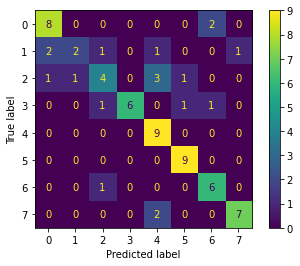

n = 5
Accuracy: 0.8
Precison: 0.8221996753246754


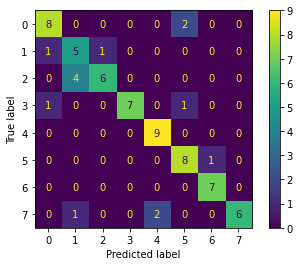

n = 10
Accuracy: 0.8285714285714286
Precison: 0.8406655844155844


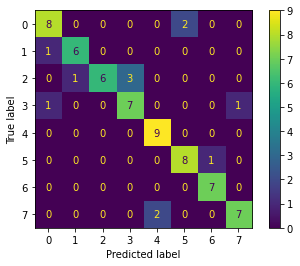

n = 15
Accuracy: 0.8142857142857143
Precison: 0.8226100288600289


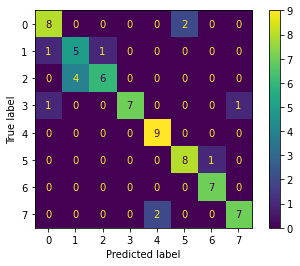

In [ ]:
# Testando o modelo random forest, que foi o melhor modelo para a base sem remoção de atributos

from sklearn.ensemble import RandomForestClassifier

#Foi feita a variação do número de arvores do modelo, os numeros de árvores testados estão na variavel n_tree

n_tree = [1, 5, 10, 15]

for n in n_tree:
  print("n =", n)
  forest = RandomForestClassifier(n_estimators=n, random_state=1)
  forest.fit(X_train, y_train)
  predictions = forest.predict(X_test)
  print('Accuracy:', metrics.accuracy_score(y_test, predictions))
  print('Precison:', metrics.precision_score(y_test, predictions, average='macro'))
  cm = metrics.confusion_matrix(y_test, predictions, labels=forest.classes_)
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
  disp.plot()
  plt.show()

  #Testei com 4 variações do hyperparametro para visualizar melhor o comportamento do modelo conforme esse parâmetro muda

  #É possível observar que com apenas 1 arvore o modelo apresenta uma acurácia e precisão menores que o encontrado pelo automl
  #Para n = 5 o valor de acurácia é igual, porém o de precisão é menor que o encotrado pelo automl
  #Para n = 10 tanto a acurácia quanto a precisão são melhores que as encotradas pelo automl
  #Com 3 testes percebi que a acurácia e precisão aumentavam conforme o n aumentava e resolvi um fazer um 4 teste para ver se isso continuava acontecendo.
  #Porém percebi que a acurácia e precisão diminuriam do n = 10 para o n = 15.

  #O melhor valor de n encontrado foi 10

Questão 2


In [ ]:
k_values = [5, 7]

for k in k_values:
    print("K =", k)
    kmeans = KMeans(n_clusters = k, random_state=0)
    labels = kmeans.fit_predict(X)
    print("Silhouette:", metrics.silhouette_score(X, labels, metric='euclidean'))

# Podemos observar que os valores de silhueta abaixo estão muito próximos, quanto mais a silhueta se apróxima de 1 significa que os clusters estão mais separados e definidos
# Quanto mais próximos de zero significa que os clusters estão mais proximos e podem estar possivelmente sobrepostos

K = 5
Silhouette: 0.11799563652574215
K = 7
Silhouette: 0.12794674190536956


In [ ]:
linkages = ['complete', 'average']

for k in k_values:
    print("K =", k)
    for link in linkages:
        ac = AgglomerativeClustering(n_clusters=k, linkage=link)
        labels = ac.fit_predict(X)
        print(f"Silhouette - {link}:", metrics.silhouette_score(X, labels, metric='euclidean'))

#Pode-se observar que o average teve um resultado melhor que o complete pois definiu melhor os clusters
#E se compararmos o hierárquico average como kmeans podemos ver que os valores deles estão muito próximos porem o hierárquico average com K=5 apresenta uma silhueta um pouco melhor

K = 5
Silhouette - complete: 0.08108985279303342
Silhouette - average: 0.1340109823711591
K = 7
Silhouette - complete: 0.09961012847101502
Silhouette - average: 0.12420893807493293


Questão Bônus

As principais vantagens que encontrei utilizando o automl foram que é relativamente rápido testar diversos modelos em sua base de dados e você tem um bom controle para selecionar e configurar quais modelos e como voce está testando-os. 

As principais desvantagens são que muitos modelos podem apresentar overfitting pois são modelos muito específicos, o automl não encontra  necessariamente o melhor valor daquele modelo que testou e ele apresentou uma certa aleatóriedade na classificação do melhor modelo, eu me deparei algumas vezes em situações que rodei o mesmo código duas vezes e os melhores modelos deram diferentes.

Para utiliza-lo garantido os melhores resultados possíveis eu usaria ele apenas para ter uma idéia geral de possíveis bons modelos para meus dados, e depois selecionaria alguns dos melhores modelos que ele achou para testar afundo e decidir qual o melhor modelo que se encaixa na minha situação.